In [198]:
import numpy as np
import pandas as pd 
import os
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from time import time

# Let's look at data

In [199]:
application_test= pd.read_csv(r"C:\Users\mlike\OneDrive\Masaüstü\AI project data\application_test.csv")

application_train = pd.read_csv(r"C:\Users\mlike\OneDrive\Masaüstü\AI project data\application_train.csv")

In [200]:
 train_labels=application_train['TARGET']
application_train.drop(['TARGET'], inplace=True, axis=1)

In [201]:
#shape of both data
print ("Shape of Training data is ",application_train.shape)
print ("Shape of Testing data is ",application_test.shape)

Shape of Training data is  (307511, 121)
Shape of Testing data is  (48744, 121)


In [202]:
#we need to get info about TARGET ,where 0 represent possiblity to paying credit on time, 1 represent vice versa 
train_labels


0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [203]:
application_train

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


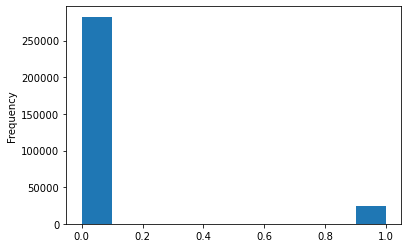

In [204]:
#let's look at histogram
train_labels.astype(int).plot.hist()

# Handling missing values

In [205]:
#Using a for loop in Python to figure out the number of missing values in each column
missing_data_application_train = application_train.isnull()
most_missing = pd.DataFrame(columns=['Column','Percentage'])

for column in missing_data_application_train.columns.values.tolist(): 
    #print(column)
    #print(missing_data_application_train[column].value_counts())
    #print("Percentage of missing values in column:",np.sum(missing_data_application_train[column])/missing_data_application_train[column].count()*100)
    #print("")
    
    if (np.sum(missing_data_application_train[column])/missing_data_application_train[column].count()*100) > 0:
        most_missing = most_missing.append({'Column': column,'Percentage':np.sum(missing_data_application_train[column])/missing_data_application_train[column].count()*100}, ignore_index=True)
    else:
        continue

In [206]:
most_missing.sort_values(by='Percentage',ascending=False).round(1)[most_missing['Percentage'] > 30]

<ipython-input-206-21339e9144bc>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  most_missing.sort_values(by='Percentage',ascending=False).round(1)[most_missing['Percentage'] > 30]


,Column,Percentage
41,COMMONAREA_MEDI,69.9
13,COMMONAREA_AVG,69.9
27,COMMONAREA_MODE,69.9
49,NONLIVINGAPARTMENTS_MEDI,69.4
35,NONLIVINGAPARTMENTS_MODE,69.4
21,NONLIVINGAPARTMENTS_AVG,69.4
51,FONDKAPREMONT_MODE,68.4
33,LIVINGAPARTMENTS_MODE,68.4
47,LIVINGAPARTMENTS_MEDI,68.4
19,LIVINGAPARTMENTS_AVG,68.4


**Drop missing columns** that they have more than 30% missing values 

In [207]:
pct_null = application_train.isnull().sum() / len(application_train)
missing_features = pct_null[pct_null > 0.30].index
application_train.drop(missing_features, axis=1, inplace=True)

In [208]:
#same for test data
pct_null1 = application_test.isnull().sum() / len(application_test)
missing_features1 = pct_null1[pct_null1 > 0.30].index
application_test.drop(missing_features1, axis=1, inplace=True)

# Then try to handle categorical,integer,float variables one by one

First we handle **categorical** variable

In [209]:
#select categorical, integer and float vaibles one by one
cat_application_train = application_train.select_dtypes(include=['object']).copy()
cat_application_test = application_test.select_dtypes(include=['object']).copy()

cat_application_train

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,MONDAY,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,THURSDAY,Religion
...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,THURSDAY,Services
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,MONDAY,XNA
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,THURSDAY,School
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,WEDNESDAY,Business Entity Type 1


In [210]:
application_train.loc[:, application_train.dtypes == 'object'].describe().T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
WEEKDAY_APPR_PROCESS_START,307511,7,TUESDAY,53901


In [211]:
#check missing values
print(cat_application_train.isnull().sum())

NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
NAME_TYPE_SUITE               1292
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
WEEKDAY_APPR_PROCESS_START       0
ORGANIZATION_TYPE                0
dtype: int64



fill NAN with **median - categorical** varibales


In [212]:
cat_application_train.fillna(cat_application_train.median,axis=0, inplace=True)
cat_application_test.fillna(cat_application_test.median,axis=0, inplace=True)


In [213]:
float_application_train = application_train.select_dtypes(include=['float']).copy()
float_application_test = application_test.select_dtypes(include=['float']).copy()

float_application_train

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,1.0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,2.0,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,1.0,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,2.0,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,1.0,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,157500.0,254700.0,27558.0,225000.0,0.032561,-8456.0,1.0,0.681632,NaN,0.0,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,72000.0,269550.0,12001.5,225000.0,0.025164,-4388.0,1.0,0.115992,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,153000.0,677664.0,29979.0,585000.0,0.005002,-6737.0,1.0,0.535722,0.218859,6.0,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,171000.0,370107.0,20205.0,319500.0,0.005313,-2562.0,2.0,0.514163,0.661024,0.0,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


In [214]:
application_train.loc[:, application_train.dtypes == 'float'].describe().T

,count,mean,std,min,25%,50%,75%,max
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_REGISTRATION,307511.0,-4986.120328,3522.886321,-2.467200e+04,-7479.500000,-4504.000000,-2010.000000,0.000000e+00
CNT_FAM_MEMBERS,307509.0,2.152665,0.910682,1.000000e+00,2.000000,2.000000,3.000000,2.000000e+01
EXT_SOURCE_2,306851.0,0.514393,0.191060,8.173617e-08,0.392457,0.565961,0.663617,8.549997e-01
EXT_SOURCE_3,246546.0,0.510853,0.194844,5.272652e-04,0.370650,0.535276,0.669057,8.960095e-01
OBS_30_CNT_SOCIAL_CIRCLE,306490.0,1.422245,2.400989,0.000000e+00,0.000000,0.000000,2.000000,3.480000e+02


In [215]:
#check again
print(cat_application_train.isnull().sum())

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64


Fill NAN with 0 -  **float varibales** , (it was unable to do with mean)


In [216]:
float_application_train.fillna(0,axis=0, inplace=True)
float_application_test.fillna(0,axis=0, inplace=True)

In [217]:
#check again
print(float_application_train.isnull().sum())

AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
REGION_POPULATION_RELATIVE    0
DAYS_REGISTRATION             0
CNT_FAM_MEMBERS               0
EXT_SOURCE_2                  0
EXT_SOURCE_3                  0
OBS_30_CNT_SOCIAL_CIRCLE      0
DEF_30_CNT_SOCIAL_CIRCLE      0
OBS_60_CNT_SOCIAL_CIRCLE      0
DEF_60_CNT_SOCIAL_CIRCLE      0
DAYS_LAST_PHONE_CHANGE        0
AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64


Handle **integer** varible, however there is not missing values 

In [218]:
int64_application_train = application_train.select_dtypes(include=['int64']).copy()
int64_application_test = application_test.select_dtypes(include=['int64']).copy()

In [219]:
application_train.loc[:, application_train.dtypes == 'int64'].describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-25229.0,-19682.0,-15750.0,-12413.0,-7489.0
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-17912.0,-2760.0,-1213.0,-289.0,365243.0
DAYS_ID_PUBLISH,307511.0,-2994.202373,1509.450419,-7197.0,-4299.0,-3254.0,-1720.0,0.0
FLAG_MOBIL,307511.0,0.999997,0.001803,0.0,1.0,1.0,1.0,1.0
FLAG_EMP_PHONE,307511.0,0.819889,0.384280,0.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,307511.0,0.199368,0.399526,0.0,0.0,0.0,0.0,1.0
FLAG_CONT_MOBILE,307511.0,0.998133,0.043164,0.0,1.0,1.0,1.0,1.0
FLAG_PHONE,307511.0,0.281066,0.449521,0.0,0.0,0.0,1.0,1.0


In [220]:
#check missing data
print(int64_application_train.isnull().sum())

SK_ID_CURR                     0
CNT_CHILDREN                   0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_5                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_7                0
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_9                0
FLAG_DOCUMENT_10               0
FLAG_DOCUMENT_11               0
FLAG_DOCUM

**time to bring back clean variables to datasets** ,
we concat all of them 


In [221]:
application_train = pd.concat([cat_application_train, float_application_train, int64_application_train], axis=1, join="inner")
application_test = pd.concat([cat_application_test, float_application_test, int64_application_test], axis=1, join="inner")

In [222]:
#shape of both data to check 
print ("Shape of Training data is ",application_train.shape)
print ("Shape of Testing data is ",application_test.shape)

Shape of Training data is  (307511, 71)
Shape of Testing data is  (48744, 71)


In [223]:
#total number of each column type
int_features = application_train.iloc[:, 2:].select_dtypes('int64').columns.values
float_features = application_train.iloc[:, 2:].select_dtypes('float').columns.values
str_features = application_train.iloc[:, 2:].select_dtypes('O').columns.values
bool_features = application_train.iloc[:,2:].select_dtypes('bool').columns.values
print('int64:',len(int_features))
print('float64:',len(float_features))
print('object:',len(str_features))
print('bool:',len(bool_features))

int64: 40
float64: 20
object: 9
bool: 0


In [224]:
# Number of unique classes in each object column
application_train.select_dtypes('object').nunique(axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                8
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

**replace the least frequent categories with a new category "others" in 'ORGANIZATION_TYPE' variable**


In [225]:
need = application_train['ORGANIZATION_TYPE'].value_counts().index[:10]
application_train['ORGANIZATION_TYPE'] = np.where(application_train['ORGANIZATION_TYPE'].isin(need), application_train['ORGANIZATION_TYPE'], 'Other')

valCount = application_train['ORGANIZATION_TYPE'].value_counts()
print (valCount)

Other                     89979
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Name: ORGANIZATION_TYPE, dtype: int64


In [226]:
need = application_test['ORGANIZATION_TYPE'].value_counts().index[:10]
application_test['ORGANIZATION_TYPE'] = np.where(application_test['ORGANIZATION_TYPE'].isin(need), application_test['ORGANIZATION_TYPE'], 'Other')

valCount = application_test['ORGANIZATION_TYPE'].value_counts()
print (valCount)

Other                     14378
Business Entity Type 3    10840
XNA                        9274
Self-employed              5920
Medicine                   1716
Government                 1508
Business Entity Type 2     1479
Trade: type 7              1303
School                     1287
Construction               1039
Name: ORGANIZATION_TYPE, dtype: int64


# creating custom features

In [227]:
#shape of both data
print ("Shape of Training data is ",application_train.shape)
print ("Shape of Testing data is ",application_test.shape)

Shape of Training data is  (307511, 71)
Shape of Testing data is  (48744, 71)


In [228]:
#creating new features
application_train['LOAN_RATE'] = application_train['AMT_ANNUITY'] /  application_train['AMT_CREDIT'] 
application_train['CREDIT_INCOME_RATIO'] =  application_train['AMT_CREDIT'] /  application_train['AMT_INCOME_TOTAL']
application_train['CHILDREN_RATIO'] = application_train['CNT_CHILDREN'] / application_train['CNT_FAM_MEMBERS']

In [229]:
application_test['LOAN_RATE'] = application_test['AMT_ANNUITY'] /  application_test['AMT_CREDIT'] 
application_test['CREDIT_INCOME_RATIO'] =  application_test['AMT_CREDIT'] /  application_test['AMT_INCOME_TOTAL']
application_test['CHILDREN_RATIO'] = application_test['CNT_CHILDREN'] / application_test['CNT_FAM_MEMBERS']

In [230]:
#shape of both data
print ("Shape of Training data is ",application_train.shape)
print ("Shape of Testing data is ",application_test.shape)

Shape of Training data is  (307511, 74)
Shape of Testing data is  (48744, 74)


In [231]:
application_train.select_dtypes('object').nunique(axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                8
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             10
dtype: int64

# Encoding

**label encode varaibles which have only 2 categories**


In [232]:
le = LabelEncoder()
le.fit(application_train['NAME_CONTRACT_TYPE'])
application_train['NAME_CONTRACT_TYPE'] = le.transform(application_train['NAME_CONTRACT_TYPE'])

le.fit(application_train['FLAG_OWN_CAR'])
application_train['FLAG_OWN_CAR'] = le.transform(application_train['FLAG_OWN_CAR'])

le.fit(application_train['FLAG_OWN_REALTY'])
application_train['FLAG_OWN_REALTY'] = le.transform(application_train['FLAG_OWN_REALTY'])



In [233]:
#same for test set
le.fit(application_test['NAME_CONTRACT_TYPE'])
application_test['NAME_CONTRACT_TYPE'] = le.transform(application_test['NAME_CONTRACT_TYPE'])

le.fit(application_test['FLAG_OWN_CAR'])
application_test['FLAG_OWN_CAR'] = le.transform(application_test['FLAG_OWN_CAR'])

le.fit(application_test['FLAG_OWN_REALTY'])
application_test['FLAG_OWN_REALTY'] = le.transform(application_test['FLAG_OWN_REALTY'])

In [234]:
#'NAME_TYPE_SUITE'
application_train.drop(['NAME_TYPE_SUITE'], axis=1, inplace=True)
application_test.drop(['NAME_TYPE_SUITE'], axis=1, inplace=True)

In [235]:
features = list(application_train.columns)


In [236]:
#shape of both data
print ("Shape of Training data is ",application_train.shape)
print ("Shape of Testing data is ",application_test.shape)

Shape of Training data is  (307511, 73)
Shape of Testing data is  (48744, 73)


# OneHotEncoding 

**OneHotEncoding for 3 and more categories** , when there is more than 2 categories, for the sake of clear understanding and 
accuracy we apply OneHotEncoding

In [237]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
app_train_oce= pd.get_dummies(application_train[['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']])
#then cancat to original df
application_train = pd.concat([application_train,app_train_oce],axis='columns')




In [238]:
#for test set
enc = OneHotEncoder(handle_unknown='ignore')
app_test_oce= pd.get_dummies(application_test[['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']])
#then cancat to original df
application_test = pd.concat([application_test,app_test_oce],axis='columns')


**then drop orginal categorical columns**

In [239]:
application_train = application_train.drop(['CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE',],axis='columns')
application_test = application_test.drop(['CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE',],axis='columns')

In [240]:
#shape of both data
print ("Shape of Training data is ",application_test.shape)
print ("Shape of Testing data is ",application_train.shape)

Shape of Training data is  (48744, 109)
Shape of Testing data is  (307511, 112)


**Align the training and testing data on columns**


In [241]:
def align_train_test(application_train, application_test) :
    
    # Align the training and testing data on columns -- this keeps only the columns present in both dataframes.
    application_train, application_test = application_train.align(application_test, join = 'inner', axis = 1)
    
    return train_labels, application_train, application_test

In [242]:
train_labels, application_train ,application_test  = align_train_test(application_train, application_test)

print('Training Features shape: ', application_train.shape)
print('Testing Features shape: ', application_test.shape)

Training Features shape:  (307511, 110)
Testing Features shape:  (48744, 110)


In [243]:
print('Training Features shape: ', application_train.shape)
print('Testing Features shape: ', application_test.shape)
print('Training Features shape: ', application_train.columns.values)

Training Features shape:  (307511, 110)
Testing Features shape:  (48744, 110)
Training Features shape:  ['AMT_ANNUITY' 'AMT_CREDIT' 'AMT_GOODS_PRICE' 'AMT_INCOME_TOTAL'
 'AMT_REQ_CREDIT_BUREAU_DAY' 'AMT_REQ_CREDIT_BUREAU_HOUR'
 'AMT_REQ_CREDIT_BUREAU_MON' 'AMT_REQ_CREDIT_BUREAU_QRT'
 'AMT_REQ_CREDIT_BUREAU_WEEK' 'AMT_REQ_CREDIT_BUREAU_YEAR'
 'CHILDREN_RATIO' 'CNT_CHILDREN' 'CNT_FAM_MEMBERS' 'CODE_GENDER_F'
 'CODE_GENDER_M' 'CREDIT_INCOME_RATIO' 'DAYS_BIRTH' 'DAYS_EMPLOYED'
 'DAYS_ID_PUBLISH' 'DAYS_LAST_PHONE_CHANGE' 'DAYS_REGISTRATION'
 'DEF_30_CNT_SOCIAL_CIRCLE' 'DEF_60_CNT_SOCIAL_CIRCLE' 'EXT_SOURCE_2'
 'EXT_SOURCE_3' 'FLAG_CONT_MOBILE' 'FLAG_DOCUMENT_10' 'FLAG_DOCUMENT_11'
 'FLAG_DOCUMENT_12' 'FLAG_DOCUMENT_13' 'FLAG_DOCUMENT_14'
 'FLAG_DOCUMENT_15' 'FLAG_DOCUMENT_16' 'FLAG_DOCUMENT_17'
 'FLAG_DOCUMENT_18' 'FLAG_DOCUMENT_19' 'FLAG_DOCUMENT_2'
 'FLAG_DOCUMENT_20' 'FLAG_DOCUMENT_21' 'FLAG_DOCUMENT_3' 'FLAG_DOCUMENT_4'
 'FLAG_DOCUMENT_5' 'FLAG_DOCUMENT_6' 'FLAG_DOCUMENT_7' 'FLAG_DOCUME

In [244]:
train = application_train.copy()
    
# Copy of the testing data
test = application_test.copy()

In [245]:
train

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,SK_ID_CURR,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,100002,0,0,0,0,0,0,1
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,100003,0,1,0,0,0,0,0
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,100004,0,1,0,0,0,0,0
3,29686.5,312682.5,297000.0,135000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,100006,0,0,0,0,0,0,1
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,100007,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,27558.0,254700.0,225000.0,157500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,456251,0,0,0,0,1,0,0
307507,12001.5,269550.0,225000.0,72000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,456252,0,1,0,0,0,0,0
307508,29979.0,677664.0,585000.0,153000.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0,0,456253,0,0,0,0,1,0,0
307509,20205.0,370107.0,319500.0,171000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,456254,0,0,0,0,0,0,1


# Correlation 

In [268]:
corr = application_train.corrwith(train_labels)
corr_abs = np.abs(corr).sort_values(ascending=False)

corr_abs.head(20)


EXT_SOURCE_2                                         0.159030
EXT_SOURCE_3                                         0.119572
DAYS_BIRTH                                           0.078239
REGION_RATING_CLIENT_W_CITY                          0.060893
REGION_RATING_CLIENT                                 0.058899
NAME_INCOME_TYPE_Working                             0.057481
NAME_EDUCATION_TYPE_Higher education                 0.056593
DAYS_LAST_PHONE_CHANGE                               0.055217
CODE_GENDER_M                                        0.054713
CODE_GENDER_F                                        0.054704
DAYS_ID_PUBLISH                                      0.051457
REG_CITY_NOT_WORK_CITY                               0.050994
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
NAME_INCOME_TYPE_Pensioner                           0.046209
ORGANIZATION_TYPE_XNA                                0.045987
FLAG_EMP_PHONE                                       0.045982
DAYS_EMP

**Does Age has impact on Target?**

In [273]:
application_train['DAYS_BIRTH'].corr(train_labels)

0.07823930830982709

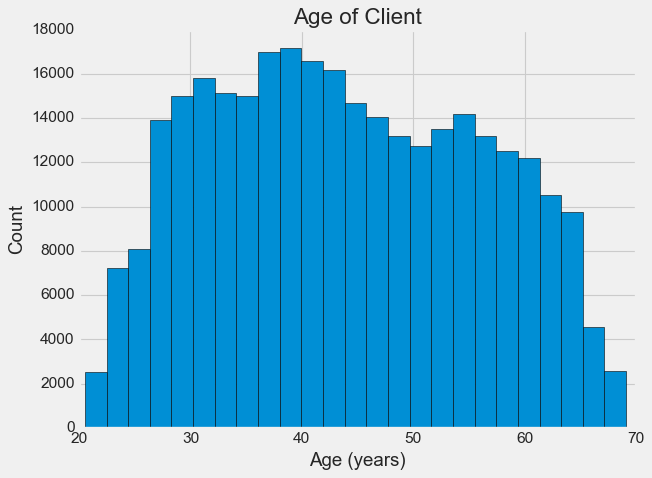

In [324]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(application_train['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

By itself, the distribution of age does not tell us much other than that there are no
outliers as all the ages are reasonable. To visualize the effect of the age on the target, we
will next make a kernel density estimation plot (KDE) colored by the value of the target. 
A kernel density estimate plot shows the distribution of a single variable and can be thought
of as a smoothed histogram (it is created by computing a kernel, usually a Gaussian, at each 
                            data point and then averaging all the individual kernels to develop 
                            a single smooth curve). We will use the seaborn kdeplot for this graph.

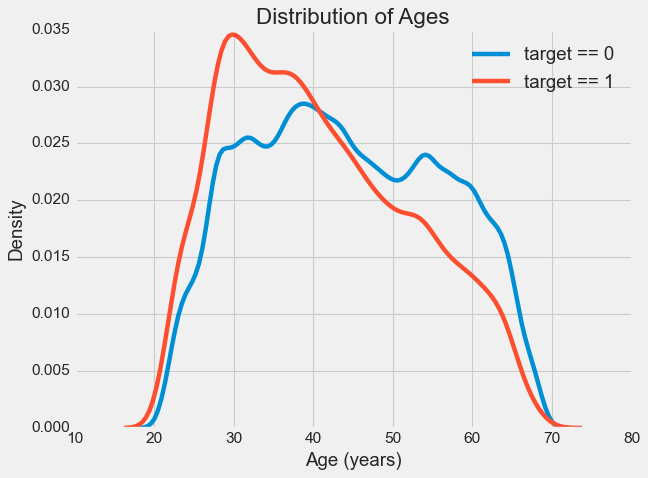

In [323]:
plt.figure(figsize = (8, 6))

# KDE plot of loans that were repaid on time
sns.kdeplot(application_train.loc[train_labels == 0, 'DAYS_BIRTH'] / -365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(application_train.loc[train_labels == 1, 'DAYS_BIRTH'] / -365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');



Then, for each bin, we calculate the average value of the target, which tells us 
the ratio of loans that were not repaid in each age category. *SO PEOPLE AGED BETWEEN 20-40 HAVE SOME DIFFICULTIES TO PAYING BACK LOANS*

**Amount of credit has impact on credit defualt ?**

<IPython.core.display.Javascript object>


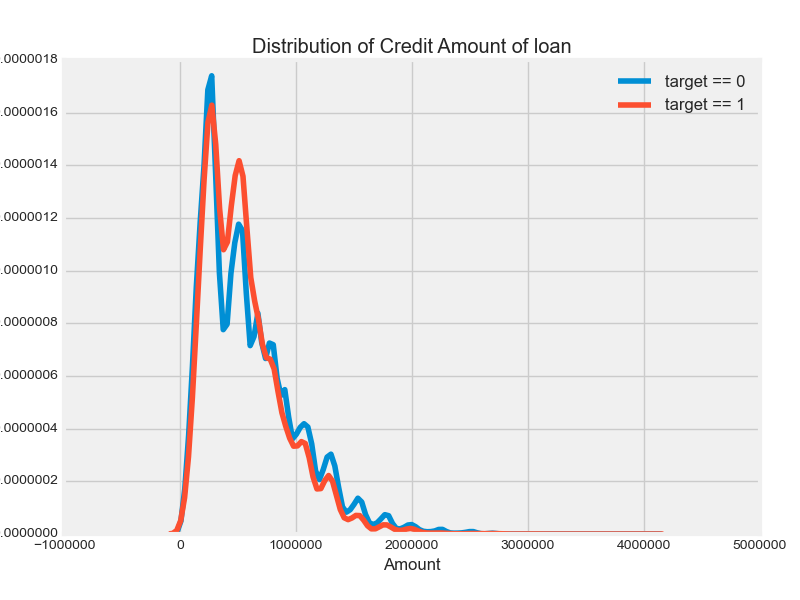

In [344]:
plt.figure(figsize = (8, 6))

# KDE plot of loans that were repaid on time
sns.kdeplot(application_train.loc[train_labels == 0, 'AMT_CREDIT'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(application_train.loc[train_labels == 1, 'AMT_CREDIT'] , label = 'target == 1')

# Labeling of plot
plt.xlabel('Amount'); plt.ylabel('Density'); plt.title('Distribution of Credit Amount of loan');

*THE GRAPH SHOWS THAT CREDIT HOLDERS WHO TOOK APPROXIMATILY AMOUNT BETWEEN 0-100,000 USD HAVE SOME PROBLEM TO PAY BACK MONEY*

# Scaling

**new set without new features**

In [249]:
columns = ['LOAN_RATE','CREDIT_INCOME_RATIO','CHILDREN_RATIO']
train1= train.drop(columns, axis=1)
test1 = test.drop(columns, axis=1)
print ("Shape of Training data is ",train1.shape)
print ("Shape of Testing data is ",test1.shape)

Shape of Training data is  (307511, 107)
Shape of Testing data is  (48744, 107)


**Even if it seem there is no missing values, I used simple imputer in order to be quite sure about sets**

In [250]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

In [251]:
# Fit imputer ON the ***training data*** (finds the median for each column...)
imputer.fit(train)

# Transform both train and test sets according to the medians found before.
display(train)
train = imputer.transform(train)
test = imputer.transform(test)
display(train)

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,SK_ID_CURR,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,100002,0,0,0,0,0,0,1
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,100003,0,1,0,0,0,0,0
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,100004,0,1,0,0,0,0,0
3,29686.5,312682.5,297000.0,135000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,100006,0,0,0,0,0,0,1
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,100007,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,27558.0,254700.0,225000.0,157500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,456251,0,0,0,0,1,0,0
307507,12001.5,269550.0,225000.0,72000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,456252,0,1,0,0,0,0,0
307508,29979.0,677664.0,585000.0,153000.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0,0,456253,0,0,0,0,1,0,0
307509,20205.0,370107.0,319500.0,171000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,456254,0,0,0,0,0,0,1


array([[2.4700500e+04, 4.0659750e+05, 3.5100000e+05, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [3.5698500e+04, 1.2935025e+06, 1.1295000e+06, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [6.7500000e+03, 1.3500000e+05, 1.3500000e+05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.9979000e+04, 6.7766400e+05, 5.8500000e+05, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.0205000e+04, 3.7010700e+05, 3.1950000e+05, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [4.9117500e+04, 6.7500000e+05, 6.7500000e+05, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

**used MinMaxScaling to normalize the range of independent variables or features of data.**

In [252]:
from sklearn.preprocessing import MinMaxScaler
# Scale each feature such that its values fall within the interval [0,1].
scaler = MinMaxScaler(feature_range = (0, 1))


In [253]:

# Fit scaler on the training data
scaler.fit(train)

# Scale the columns within the training and test sets.
display(train)
train = scaler.transform(train)
test = scaler.transform(test)
display(train)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

array([[2.4700500e+04, 4.0659750e+05, 3.5100000e+05, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [3.5698500e+04, 1.2935025e+06, 1.1295000e+06, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [6.7500000e+03, 1.3500000e+05, 1.3500000e+05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.9979000e+04, 6.7766400e+05, 5.8500000e+05, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.0205000e+04, 3.7010700e+05, 3.1950000e+05, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [4.9117500e+04, 6.7500000e+05, 6.7500000e+05, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

array([[0.09572891, 0.09028652, 0.08666667, ..., 0.        , 0.        ,
        1.        ],
       [0.1383526 , 0.31173596, 0.27888889, ..., 0.        , 0.        ,
        0.        ],
       [0.02616021, 0.02247191, 0.03333333, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.11618619, 0.15796854, 0.14444444, ..., 1.        , 0.        ,
        0.        ],
       [0.07830621, 0.08117528, 0.07888889, ..., 0.        , 0.        ,
        1.        ],
       [0.19035909, 0.15730337, 0.16666667, ..., 1.        , 0.        ,
        0.        ]])

Training data shape:  (307511, 110)
Testing data shape:  (48744, 110)


**scaling and apply imputer train1 and test1 sets**

In [254]:
# Fit imputer ON the ***training data*** (finds the median for each column...)
imputer.fit(train1)

# Transform both train and test sets according to the medians found before.
display(train1)
train1 = imputer.transform(train1)
test1 = imputer.transform(test1)
display(train1)

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,SK_ID_CURR,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,100002,0,0,0,0,0,0,1
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,100003,0,1,0,0,0,0,0
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,100004,0,1,0,0,0,0,0
3,29686.5,312682.5,297000.0,135000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,100006,0,0,0,0,0,0,1
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,100007,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,27558.0,254700.0,225000.0,157500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,456251,0,0,0,0,1,0,0
307507,12001.5,269550.0,225000.0,72000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,456252,0,1,0,0,0,0,0
307508,29979.0,677664.0,585000.0,153000.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0,0,456253,0,0,0,0,1,0,0
307509,20205.0,370107.0,319500.0,171000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,456254,0,0,0,0,0,0,1


array([[2.4700500e+04, 4.0659750e+05, 3.5100000e+05, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [3.5698500e+04, 1.2935025e+06, 1.1295000e+06, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [6.7500000e+03, 1.3500000e+05, 1.3500000e+05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.9979000e+04, 6.7766400e+05, 5.8500000e+05, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.0205000e+04, 3.7010700e+05, 3.1950000e+05, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [4.9117500e+04, 6.7500000e+05, 6.7500000e+05, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

In [255]:
# Fit scaler on the training data
scaler.fit(train1)

# Scale the columns within the training and test sets.
display(train1)
train1 = scaler.transform(train1)
test1 = scaler.transform(test1)
display(train1)

print('Training data shape: ', train1.shape)
print('Testing data shape: ', test1.shape)

array([[2.4700500e+04, 4.0659750e+05, 3.5100000e+05, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [3.5698500e+04, 1.2935025e+06, 1.1295000e+06, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [6.7500000e+03, 1.3500000e+05, 1.3500000e+05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.9979000e+04, 6.7766400e+05, 5.8500000e+05, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.0205000e+04, 3.7010700e+05, 3.1950000e+05, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [4.9117500e+04, 6.7500000e+05, 6.7500000e+05, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

array([[0.09572891, 0.09028652, 0.08666667, ..., 0.        , 0.        ,
        1.        ],
       [0.1383526 , 0.31173596, 0.27888889, ..., 0.        , 0.        ,
        0.        ],
       [0.02616021, 0.02247191, 0.03333333, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.11618619, 0.15796854, 0.14444444, ..., 1.        , 0.        ,
        0.        ],
       [0.07830621, 0.08117528, 0.07888889, ..., 0.        , 0.        ,
        1.        ],
       [0.19035909, 0.15730337, 0.16666667, ..., 1.        , 0.        ,
        0.        ]])

Training data shape:  (307511, 107)
Testing data shape:  (48744, 107)


**in order drop cillinear features to improve accuracy**

# DATA MODELLING

First of all, GridSearhCV was used for **Hperparameter Tuning** for **Logistic regression** for both new features and 
without new features. Then implemnt it for **Random Forest Classifier and Desicion tree** like Logistic regression

In [54]:
# Note: here we're specifying the regularization parameter C
log_reg = LogisticRegression()


In [55]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C =  [1.0, 0.1, 0.01]

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
clf = GridSearchCV(log_reg, hyperparameters, cv=5, verbose=0, n_jobs=-1)

# Fit randomized search
best_model = clf.fit(train, train_labels)


# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.01


C:\Users\mlike\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
#best logistic model for set that have all features
log_reg = LogisticRegression(C=0.01, penalty='l2')
# Train on the training data
log_reg.fit(train, train_labels)

# Make predictions on the test data
predictions = log_reg.predict_proba(test)[:, 1]
print(log_reg)

# Make a submission dataframe
submit = application_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('log_reg_main_baseline.csv', index = False)

C:\Users\mlike\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-56-e96e207d10ac>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['TARGET'] = predictions


LogisticRegression(C=0.01)


kaggle score *0.70082*

**Train the next set which has not new features added**

In [59]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C =  [1.0, 0.1, 0.01]

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
clf = GridSearchCV(log_reg, hyperparameters,  cv=5, verbose=0, n_jobs=-1)

# Fit randomized search
best_model = clf.fit(train1, train_labels)


# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0


C:\Users\mlike\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**the best logistic model for set that have all features**


In [60]:
log_reg = LogisticRegression(C=1.0 , penalty='l2')
# Train on the training data
log_reg.fit(train1, train_labels)

# Make predictions on the test data
predictions = log_reg.predict_proba(test1)[:, 1]
print(log_reg)

# Make a submission dataframe
submit = test1[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('log_reg_main_baseline2.csv', index = False)

C:\Users\mlike\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-60-520f9138088f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['TARGET'] = predictions


LogisticRegression()


In [61]:
#kaggle score 0.61526

**tuning in Random Forest**

In [68]:
#GridSearch  Hyperparamater tuning
random_forest = RandomForestClassifier()

In [257]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from time import time

#randint is an intertor for generating numbers between range specified
from scipy.stats import randint

In [258]:
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": randint(1,11),
              "min_samples_split": randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}


In [259]:
#Save mean cross-validated accuracy scores of best models

cross_valid_scores = {}

In [72]:
#Rondom forest
parameters = {
    "n_estimators": [25 , 50, 200], 
    "max_depth": [10, 15 , 25],
}

model_random_forest = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
)

model_random_forest = GridSearchCV(
    model_random_forest, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_random_forest.fit(train, train_labels)

print('-----')
print(f'Best parameters {model_random_forest.best_params_}')
print(
    f'Accuracy score of the best_estimator: '+ \
    f'{model_random_forest.best_score_:.3f}'
)
cross_valid_scores['random_forest'] = model_random_forest.best_score_
print('-----')

-----
Best parameters {'max_depth': 25, 'n_estimators': 200}
Accuracy score of the best_estimator: 0.914
-----


In [73]:
#RF prediction with all features///
#best model for Random Forest. There is small accuracy difference when we drop new features that created above

random_forest = RandomForestClassifier(n_estimators= 200, max_depth = 25)
# Train on the training data
random_forest.fit(train, train_labels)

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]
print(random_forest)

# Make a submission dataframe
submit = application_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_main1_baseline.csv', index = False)

RandomForestClassifier(max_depth=25, n_estimators=200)


<ipython-input-73-539394918ac9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['TARGET'] = predictions


In [74]:
#kaggle score 0.71403

In [75]:
#Rondom forest
parameters = {
    "n_estimators": [25, 50, 200], 
    "max_depth": [10, 15 , 25],
}

model_random_forest1 = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
)

model_random_forest1 = GridSearchCV(
    model_random_forest1, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_random_forest1.fit(train1, train_labels)

print('-----')
print(f'Best parameters {model_random_forest1.best_params_}')
print(
    f'Accuracy score of the best_estimator: '+ \
    f'{model_random_forest1.best_score_:.3f}'
)
cross_valid_scores['random_forest2'] = model_random_forest1.best_score_
print('-----')

-----
Best parameters {'max_depth': 25, 'n_estimators': 200}
Accuracy score of the best_estimator: 0.915
-----


In [262]:
#without new features
random_forest1 = RandomForestClassifier(n_estimators= 200, max_depth = 25)
# Train on the training data
random_forest1.fit(train1, train_labels)

# Make predictions on the test data
predictions1 = random_forest1.predict_proba(test1)[:, 1]
print(random_forest1)

# Make a submission dataframe
submit = application_test[['SK_ID_CURR']]
submit['TARGET'] = predictions1

# Save the submission dataframe
submit.to_csv('random_forest_main2_baseline.csv', index = False)

RandomForestClassifier(max_depth=25, n_estimators=200)


<ipython-input-262-74b029965a22>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['TARGET'] = predictions1


In [77]:
# best model without new features 0.70529

**it shows : Best parameters {'max_depth': 15, 'n_estimators': 200}** , 

**kaggle score 0.71403, it seems,it's best score**
#Wall time: 11min 23s

In [78]:
#desicion tree

parameters = {
    "max_depth": [10,15,25,50,100],
}

model_desicion_tree = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced',
)

model_desicion_tree = GridSearchCV(
    model_desicion_tree, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_desicion_tree.fit(train, train_labels)

print('-----')
print(f'Best parameters {model_desicion_tree.best_params_}')
print(
    f'Accuracy score of the best_estimator: ' + \
    f'{model_desicion_tree.best_score_:.3f}'
)
cross_valid_scores['desicion_tree'] = model_desicion_tree.best_score_
print('-----')

-----
Best parameters {'max_depth': 100}
Accuracy score of the best_estimator: 0.860
-----


In [79]:
#decision tree

dt_clf = DecisionTreeClassifier(max_depth =100)
dt_clf = dt_clf.fit(train,train_labels)
dt_predictions = dt_clf.predict_proba(test)[:, 1]
print(dt_clf)

# Make a submission dataframe
submit = application_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission datafraInverse of regularization strength me
submit.to_csv('decision_tree_baseline.csv', index = False)

DecisionTreeClassifier(max_depth=100)


<ipython-input-79-b030657d31e6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['TARGET'] = predictions


**desicion tree 0.61526 on kaggle**

In [80]:
parameters = {
    "max_depth": [10,15,25,50,100],
}

model_desicion_tree = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced',
)

model_desicion_tree = GridSearchCV(
    model_desicion_tree, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_desicion_tree.fit(train1, train_labels)

print('-----')
print(f'Best parameters {model_desicion_tree.best_params_}')
print(
    f'Accuracy score of the best_estimator: ' + \
    f'{model_desicion_tree.best_score_:.3f}'
)
cross_valid_scores['desicion_tree'] = model_desicion_tree.best_score_
print('-----')

-----
Best parameters {'max_depth': 100}
Accuracy score of the best_estimator: 0.862
-----


**Decision tree** for set without new features

In [264]:
dt_clf = DecisionTreeClassifier(max_depth =100)
dt_clf = dt_clf.fit(train1,train_labels)
dt_predictions = dt_clf.predict_proba(test1)[:, 1]
print(dt_clf)

# Make a submission dataframe
submit = application_test[['SK_ID_CURR']]
submit['TARGET'] = dt_predictions

# Save the submission dataframe
submit.to_csv('decision_tree_baseline12345.csv', index = False)

DecisionTreeClassifier(max_depth=100)


<ipython-input-264-9971fa3069f7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['TARGET'] = dt_predictions


**decision tree 0.53369**

**Decision tree is not good model for our prediction as random forest**

**Best model is Random forest classifier here. it gives about 71% accuracy when (n_estimators= 200, max_depth = 25)**
(include new features, it increase circa 0,5% accuracy)

**RF prediction with all features** ////
best model for Random Forest. There is small accuracy difference when we drop new features that created above

In [82]:
#RF prediction with all features///
#best model for Random Forest. There is small accuracy difference when we drop new features that created above

random_forest = RandomForestClassifier(n_estimators= 200, max_depth = 25)
# Train on the training data
random_forest.fit(train, train_labels)

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]
print(random_forest)

# Make a submission dataframe
submit = application_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_main1_baseline.csv', index = False)

RandomForestClassifier(max_depth=25, n_estimators=200)


<ipython-input-82-539394918ac9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['TARGET'] = predictions


**accuracy score 0.71403 on kaggle**